# BID PYMES

In [1]:
!pip install xlsxwriter

Looking in indexes: https://nrm.us.equifax.com/repository/efxpypi/simple, https://nrm.us.equifax.com/repository/df-vertexai-release-pypi-hosted/simple
  Using cached https://nrm.us.equifax.com/repository/efxpypi/packages/xlsxwriter/3.2.0/XlsxWriter-3.2.0-py3-none-any.whl (159 kB)


In [2]:
# Libraries
import pandas as pd
from pathlib import Path
from scoring import VD
from scoring import Performance
from scoring import func_performance
import subprocess
from google.cloud import bigquery
import pandas as pd
import numpy as np
import datetime as dt
#import sweetviz as sv
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd
import seaborn as sns

# Ignora los warnings 
import warnings
warnings.filterwarnings('ignore')

from google.cloud import storage

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
#pd.set_option('max_colwidth', -1)

In [ ]:
# String similarity

### Importar Base

In [3]:
df = pd.DataFrame()
client = bigquery.Client()

query = client.query(
r'''
  SELECT * FROM `dfa-dna-ws0017-la-prd-2423.DS_INFO_LABORAL_HN.HN_TTEL_DIR_EXTERNA`
'''
)

# Almacenar consulta BigQuery en pandas df
df = query.to_dataframe()
print(df.shape)

df.head()

(10538686, 15)


,EMPRESA,RAZON,RTN,DIREC,TELEFONO,IDENTIDAD,NOMBRECOMP,TELEFONOEM,CELULAREMP,DIRECCIONE,PERIODO,FECHA_CARGA,OTROTELEFONO1,OTROTELEFONO2,NUME_NIDE
0,SISTEMAS Y TEC.IND.DE PROTEC.PREV.S.A.C.V.,SISTEC,None,CORTES SAN PEDRO SULA SAN PEDRO SULA SAN PEDRO...,22305293,5caafd4f16eb51ef4c94263e14016ee600bea559a31185...,4cad39239ec6fca7a86893092b7c2c5eeadd148d583e1a...,None,None,CTRA.A PTO.CORTES FTE.DIAPA EL ROB,201912,20191231,None,None,0004581440
1,VALLE LARA CARLOS HUMBERTO,COMERCIAL VALLE,None,CORTES SAN PEDRO SULA SAN PEDRO SULA SAN PEDRO...,None,e0317135395c850223166ecef97775a4528441b5bf5f65...,e535450ecfd4df25257ac7019e9ab0bb5d970f09b4ef03...,None,None,2-3AV.6-7CLL.S.O.BA.EL CENTRO,201912,20191231,None,None,0002502372
2,CASTILLO RIGOBERTO,CASTILLOS AUTOSERVICIOS,None,CORTES SAN PEDRO SULA SAN PEDRO SULA SAN PEDRO...,25614093,e34c288659ea1bde2c161f5deaf5890ffc7378301cd00d...,3b7af131340af38d64d17f990d597421438cc1609ccc63...,None,97775049,SPS 2A-2B.AVE.9-10CLL.N.O.LAS ACAC,201912,20191231,None,None,0004494011
3,INSTITUTO NACIONAL DE JUBILADOS Y PENSIONADOS ...,INJUPEMP (PENSIONADOS),None,FRANCISCO MORAZAN DISTRITO CENTRAL DISTRITO CE...,22399831,8eafe22c4f46050e81a55451e7dd616874709b8279a078...,f38f18b11b0255fc444d1d1996270f9e0464c9921445b9...,22255875,32057310,TEGA LOMA LINDA NORTE CGO A SECRETARIA DE RECU...,201912,20191231,None,None,0001202600
4,DERMALASER S.A.DE C.V.,DERMALASER S.A.DE C.V.,None,CORTES SAN PEDRO SULA SAN PEDRO SULA SAN PEDRO...,22366588,62c430b8696205d92fc5f390239cf97e7b7ac43a90f4aa...,b6e12db05b265aa9d2a342cc15b428f68977f1a8c4b344...,None,99818795,"S.P.S BO RIO DE PIEDRA, 9 CLL, 18 AVE B.",201912,20191231,None,None,0004491278


In [11]:
# dfa_dna_ws0017_la_prd_sandbox.hn_bid_cantidad_empleados_base_laboral


cruce = pd.DataFrame()
client = bigquery.Client()

query = client.query(
r'''
  SELECT * FROM `dfa_dna_ws0017_la_prd_sandbox.hn_bid_cantidad_empleados_base_laboral`
'''
)

# Almacenar consulta BigQuery en pandas df
cruce = query.to_dataframe()
print(cruce.shape)

cruce.sort_values(['IDs'], ascending=False).head()

(27062, 17)


,cluster_id,IDs,porc_data_bandeuda,reg_prom_bandeuda,cuentas_prom_bandeuda,min_periinfo_bandeuda,max_periinfo_bandeuda,porc_data_tardeuda,reg_prom_tardeuda,cuentas_prom_tardeuda,min_periinfo_tardeuda,max_periinfo_tardeuda,porc_data_deucomer,reg_prom_deucomer,cuentas_prom_deucomer,min_periinfo_deucomer,max_periinfo_deucomer
6492,SECRETARIA DE EDUCACION PUBLICA,67571,0.742375,68.200071,5.852718,201909,202408,0.464178,32.666529,1.522058,201909,202408,0.913025,148.376330,10.056666,201909,202408
17267,INSTITUTO HONDUREO DE SEGURIDAD SOCIAL,52570,0.310082,18.095302,1.452197,201909,202408,0.282614,25.186190,1.026555,201909,202408,0.669545,66.581739,3.840346,201909,202408
4319,SECRETARIA DE SALUD PUBLICA Y ASISTENCIA SOCIAL,32817,0.731145,50.121461,3.995582,201909,202408,0.499771,36.504677,1.709998,201909,202408,0.910595,130.318920,8.661852,201909,202408
18893,INSTITUTO NACIONAL DE JUBILADOS Y PENSIONADOS ...,25184,0.713191,48.891280,3.900889,201909,202408,0.379368,36.671498,1.441788,201909,202408,0.839462,106.897713,6.224865,201909,202408
8089,SECRETARIA DE SEGURIDAD,23973,0.351437,12.607433,0.932883,201909,202408,0.317816,13.445293,0.751137,201909,202408,0.839361,69.817002,4.266800,201909,202408


In [12]:
# Calcula los percentiles 20, 40, 60 y 80 de la columna "IDs"
percentiles = np.percentile(cruce['IDs'], [20, 40, 60, 80])

# Crea una nueva columna llamada "quintil"
cruce['quintil'] = 1

# Asigna los quintiles basándose en los percentiles
for i, p in enumerate(percentiles):
    cruce['quintil'] = np.where(cruce['IDs'] > p, i + 2, cruce['quintil'])

# Muestra las primeras 5 filas del DataFrame
cruce.head()

,cluster_id,IDs,porc_data_bandeuda,reg_prom_bandeuda,cuentas_prom_bandeuda,min_periinfo_bandeuda,max_periinfo_bandeuda,porc_data_tardeuda,reg_prom_tardeuda,cuentas_prom_tardeuda,min_periinfo_tardeuda,max_periinfo_tardeuda,porc_data_deucomer,reg_prom_deucomer,cuentas_prom_deucomer,min_periinfo_deucomer,max_periinfo_deucomer,quintil
0,APTIV SERVICES HONDURAS S DE RL,2976,0.597446,24.254032,5.681788,201909,202408,0.180444,8.492272,0.421371,201909,202408,0.538306,25.642473,1.722782,201909,202408,5
1,STANDARD FRUIT DE HONDURAS SA,1695,0.536873,37.437758,2.582301,201909,202408,0.363422,26.724484,1.191740,201909,202408,0.693215,46.033628,3.892035,201909,202408,5
2,IBEX HONDURAS S A DE C V,1503,0.300732,6.721224,0.730539,201909,202408,0.440452,12.059215,0.912841,201909,202408,0.684631,51.501663,3.086494,201909,202408,5
3,EMPRESA AVICOLA EL CORTIJO,1399,0.739814,51.097927,3.133667,201909,202408,0.438885,21.807005,1.202287,201909,202408,0.911365,94.546104,8.316655,201909,202408,5
4,TELEFONICA CELULAR SA,1227,0.881826,74.384678,4.801141,201909,202408,0.906275,98.255094,4.256724,201909,202408,0.982885,248.252649,17.746536,201909,202408,5


In [100]:
cruce['quintil'] = pd.qcut(cruce['IDs'], q=13, labels=False, duplicates='drop')
# Calcula la media de 'IDs' para cada 'quintil' y ordena de mayor a menor
quintil_means = cruce.groupby('quintil')['IDs'].mean().sort_values(ascending=False)

# Convierte la serie a DataFrame
quintil_means_df = quintil_means.reset_index()

quintil_means_df

,quintil,IDs
0,9,641.782483
1,8,56.398034
2,7,26.161339
3,6,14.972792
4,5,9.910019
5,4,6.85575
6,3,5.0
7,2,4.0
8,1,3.0
9,0,1.308266


In [15]:
cruce.head()

,cluster_id,IDs,porc_data_bandeuda,reg_prom_bandeuda,cuentas_prom_bandeuda,min_periinfo_bandeuda,max_periinfo_bandeuda,porc_data_tardeuda,reg_prom_tardeuda,cuentas_prom_tardeuda,min_periinfo_tardeuda,max_periinfo_tardeuda,porc_data_deucomer,reg_prom_deucomer,cuentas_prom_deucomer,min_periinfo_deucomer,max_periinfo_deucomer,quintil
0,APTIV SERVICES HONDURAS S DE RL,2976,0.597446,24.254032,5.681788,201909,202408,0.180444,8.492272,0.421371,201909,202408,0.538306,25.642473,1.722782,201909,202408,4
1,STANDARD FRUIT DE HONDURAS SA,1695,0.536873,37.437758,2.582301,201909,202408,0.363422,26.724484,1.191740,201909,202408,0.693215,46.033628,3.892035,201909,202408,4
2,IBEX HONDURAS S A DE C V,1503,0.300732,6.721224,0.730539,201909,202408,0.440452,12.059215,0.912841,201909,202408,0.684631,51.501663,3.086494,201909,202408,4
3,EMPRESA AVICOLA EL CORTIJO,1399,0.739814,51.097927,3.133667,201909,202408,0.438885,21.807005,1.202287,201909,202408,0.911365,94.546104,8.316655,201909,202408,4
4,TELEFONICA CELULAR SA,1227,0.881826,74.384678,4.801141,201909,202408,0.906275,98.255094,4.256724,201909,202408,0.982885,248.252649,17.746536,201909,202408,4


In [101]:
#cluster_id
empresas_por_quintil = cruce.groupby('quintil')['cluster_id'].apply(list).reset_index()

In [102]:
empresas_por_quintil

,quintil,cluster_id
0,0,"[TEGNOLOGIA LACTEA SA, COMPANIA GENERAL AL I..."
1,1,"[LACASU S DE R L, LA CASA DE LAS LAS LIRAS S ..."
2,2,"[CONCRETOS Y ACEROS SDE RLDE CV, BRIZZIO RI..."
3,3,"[FERNANDEZ JOSE GERARDO, CONSTRU MAR SDE RL..."
4,4,"[PET HOUSE S DE R L, INVERSIONES ERAZO SADE..."
5,5,"[CONSULTAG S A DE C V, JLB SOLUCIONES S DE RL ..."
6,6,"[VILLAFRANCA ROMERO MARIA DE JESUS, AGUA PARA ..."
7,7,[ASOCDE COMAYAGUELA HONDDE LOS ADVENTISTAS DEL...
8,8,"[FOSTER PARENTS PLAN INTERNACIONAL, IBAGARI BO..."
9,9,"[APTIV SERVICES HONDURAS S DE RL, STANDARD FRU..."


In [103]:
empresas_por_quintil.to_excel('empresas_por_quintil.xlsx', index=False)

In [71]:
# dfa_dna_ws0017_la_prd_sandbox.hn_bid_cantidad_empleados_base_laboral


bandeuda = pd.DataFrame()
client = bigquery.Client()

query = client.query(
r'''
  SELECT * FROM `dfa_dna_ws0017_la_prd_sandbox.hn_bid_info_emp_bandeuda`
'''
)

# Almacenar consulta BigQuery en pandas df
bandeuda = query.to_dataframe()
print(bandeuda.shape)

bandeuda.head()

(82281, 50)


,nume_nide,periodoinformacion,descripciontipodeudor,descripcionactividadeconomica,numerooperacion,fechaotorgamiento,fechacancelacion,fechavencimiento,saldovigente,saldomora,saldovencimiento,saldoejecucion,saldocontingente,saldocastigado,tipogarantia,descripcioncodigomoneda,categoriariesgodefinitivatransf,descripciontipocredito,montooriginal,saldointeresesxcobrar,saldointeresessuspenso,valorgarantia,tasainteres,descripcionformapago,periodogracia,diasatrasados,saldocomisionesxcobrar,descripcioncreditoespecial,descripcionorigenfondos,descripcioncreditorenegociado,descripcionubicaciongeografica,saldocapitalmora,saldointeresesmora,tipooperacion,codigofuente,descripcioncodigofuente,fechainformacion,montocuota,categoriaindividual,descripcioncodigoregion,categoriariesgodefinitiva,porcentajereserva,estadooperacion,descripcioncreditogrupal,fechaultimopago,costoanual,tasainteresmoratoria,montoprovision,monedareferencia,plazocredito
0,0002500465,202408,DEUDOR DIRECTO,None,1709bf212070f8ee897de1b6a1c31a4c7ef341c0e36af3...,20160217,00000000,20310217,776246.950000000,0E-9,0E-9,0E-9,0E-9,0E-9,01,LEMPIRA,I-A,COMERCIAL,2500000.000000000,3793.470000000,0E-9,5639200.000000000,12.500000000,Cuota Nivelada Mensual,000,00000,0E-9,,FONDOS PROPIOS,,FRANCISCO MORAZAN,0E-9,0E-9,110000,0123,BAC DE HONDURAS,20240831,37570.670000000,1A10,URBANA,1A10,000050,VIG,NO APLICA,00000000,13.240000000,24.000000000,3900.200000000,None,180
1,0002500465,202102,DEUDOR DIRECTO,None,1709bf212070f8ee897de1b6a1c31a4c7ef341c0e36af3...,20160217,00000000,20310217,1774055.000000000,0E-9,0E-9,0E-9,0E-9,0E-9,01,LEMPIRA,I-A,COMERCIAL,2500000.000000000,85823.210000000,0E-9,5639200.000000000,12.500000000,Cuota Nivelada Mensual,000,00000,0E-9,NO APLICA,FONDOS PROPIOS,NO APLICA,FRANCISCO MORAZAN,0E-9,0E-9,110000,0123,BAC DE HONDURAS,20210228,37570.670000000,1A10,URBANA,1A10,000050,VIG,NO APLICA,20210222,13.240000000,24.000000000,9299.390000000,None,180
2,0002500465,202303,DEUDOR DIRECTO,None,1709bf212070f8ee897de1b6a1c31a4c7ef341c0e36af3...,20160217,00000000,20310217,1233029.470000000,0E-9,0E-9,0E-9,0E-9,0E-9,01,LEMPIRA,I-A,COMERCIAL,2500000.000000000,36896.570000000,0E-9,5639200.000000000,12.500000000,Cuota Nivelada Mensual,000,00000,0E-9,,FONDOS PROPIOS,,FRANCISCO MORAZAN,0E-9,0E-9,110000,0123,BAC DE HONDURAS,20230331,37570.670000000,1A10,URBANA,1A10,000050,VIG,NO APLICA,00000000,13.240000000,24.000000000,6349.630000000,None,180
3,0002500465,202010,DEUDOR DIRECTO,None,1709bf212070f8ee897de1b6a1c31a4c7ef341c0e36af3...,20160217,00000000,20310217,1846366.170000000,0E-9,0E-9,0E-9,0E-9,0E-9,01,LEMPIRA,I-A,COMERCIAL,2500000.000000000,88227.860000000,0E-9,5639200.000000000,12.500000000,Cuota Nivelada Mensual,002,00000,0E-9,NO APLICA,FONDOS PROPIOS,NO APLICA,FRANCISCO MORAZAN,0E-9,0E-9,110000,0123,BAC DE HONDURAS,20201031,37570.670000000,1A10,URBANA,1A10,000050,VIG,NO APLICA,20070831,13.240000000,24.000000000,9672.970000000,None,180
4,0002500465,202307,DEUDOR DIRECTO,None,1709bf212070f8ee897de1b6a1c31a4c7ef341c0e36af3...,20160217,00000000,20310217,1132695.420000000,0E-9,0E-9,0E-9,0E-9,0E-9,01,LEMPIRA,I-A,COMERCIAL,2500000.000000000,27554.600000000,0E-9,5639200.000000000,12.500000000,Cuota Nivelada Mensual,000,00000,0E-9,,FONDOS PROPIOS,,FRANCISCO MORAZAN,0E-9,0E-9,110000,0123,BAC DE HONDURAS,20230731,37570.670000000,1A10,URBANA,1A10,000050,VIG,NO APLICA,00000000,13.240000000,24.000000000,5801.250000000,None,180


In [74]:
# Calcular la sumatoria de nulos en cada columna
nulos_por_columna = bandeuda.isnull().sum()

# Imprimir el resultado
nulos_por_columna

# Convert the series to a DataFrame
nulos_por_columna_df = nulos_por_columna.reset_index()

# Rename the columns
nulos_por_columna_df.columns = ['nombre_columna', 'nulos']

nulos_por_columna_df

,nombre_columna,nulos
0,nume_nide,0
1,periodoinformacion,0
2,descripciontipodeudor,0
3,descripcionactividadeconomica,82281
4,numerooperacion,0
5,fechaotorgamiento,0
6,fechacancelacion,0
7,fechavencimiento,0
8,saldovigente,3164
9,saldomora,0


In [25]:
bandeuda.columns

Index(['nume_nide', 'periodoinformacion', 'descripciontipodeudor',
       'descripcionactividadeconomica', 'numerooperacion', 'fechaotorgamiento',
       'fechacancelacion', 'fechavencimiento', 'saldovigente', 'saldomora',
       'saldovencimiento', 'saldoejecucion', 'saldocontingente',
       'saldocastigado', 'tipogarantia', 'descripcioncodigomoneda',
       'categoriariesgodefinitivatransf', 'descripciontipocredito',
       'montooriginal', 'saldointeresesxcobrar', 'saldointeresessuspenso',
       'valorgarantia', 'tasainteres', 'descripcionformapago', 'periodogracia',
       'diasatrasados', 'saldocomisionesxcobrar', 'descripcioncreditoespecial',
       'descripcionorigenfondos', 'descripcioncreditorenegociado',
       'descripcionubicaciongeografica', 'saldocapitalmora',
       'saldointeresesmora', 'tipooperacion', 'codigofuente',
       'descripcioncodigofuente', 'fechainformacion', 'montocuota',
       'categoriaindividual', 'descripcioncodigoregion',
       'categoriariesgodef

In [28]:
periodos = bandeuda.periodoinformacion.unique()

In [29]:
# Create a DataFrame with the periodos array
df_periodos = pd.DataFrame({'periodos': periodos})

# Sort the DataFrame by the periodos column
df_periodos_sorted = df_periodos.sort_values('periodos')

df_periodos_sorted

,periodos
56,201909
35,201910
25,201911
57,201912
15,202001
17,202002
46,202003
40,202004
42,202005
58,202006


In [31]:
# Convert 'fechaotorgamiento' to datetime
bandeuda['fechaotorgamiento_2'] = pd.to_datetime(bandeuda['fechaotorgamiento'], format='%Y%m%d')

# Format 'fechaotorgamiento' to YYYYMM
bandeuda['fechaotorgamiento_2'] = bandeuda['fechaotorgamiento_2'].dt.strftime('%Y%m')

# Calcula el valor máximo y mínimo de la columna `fechaotorgamiento_2`
print(f"Valor máximo: {int(bandeuda['fechaotorgamiento_2'].max())}")
print(f"Valor mínimo: {int(bandeuda['fechaotorgamiento_2'].min())}")

Valor máximo: 202408
Valor mínimo: 199412


In [32]:
# Convert 'fechaotorgamiento' to datetime
bandeuda['fechavencimiento_2'] = pd.to_datetime(bandeuda['fechavencimiento'], format='%Y%m%d')

# Format 'fechaotorgamiento' to YYYYMM
bandeuda['fechavencimiento_2'] = bandeuda['fechavencimiento_2'].dt.strftime('%Y%m')


In [50]:
# Convierte las columnas `periodoinformacion` y `fechavencimiento` a numérico
bandeuda['periodoinformacion_2'] = pd.to_numeric(bandeuda['periodoinformacion'], errors='coerce')
bandeuda['fechavencimiento_2'] = pd.to_numeric(bandeuda['fechavencimiento_2'], errors='coerce')

# Create boolean columns
bandeuda['vencido'] = bandeuda['fechavencimiento_2'] > bandeuda['periodoinformacion_2']
bandeuda['no_vencido'] = bandeuda['fechavencimiento_2'] <= bandeuda['periodoinformacion_2']

# Group by 'nume_nide' and sum the boolean columns
vencidos_por_nume_nide = bandeuda.groupby('nume_nide')[['vencido', 'no_vencido']].sum()

# Imprime la cantidad de valores únicos de `nume_nide`
vencidos_por_nume_nide.no_vencido.sum()


1559

In [37]:
bandeuda[['periodoinformacion', 'fechavencimiento_2']].sample(10)

,periodoinformacion,fechavencimiento_2
79553,202312,202503
48260,202003,202007
72069,202309,202403
19710,202210,203210
52189,202007,202101
35584,202210,202302
13912,202108,202110
14638,202312,203510
66419,202211,202608
41307,202202,202205


In [40]:
# Convierte `periodoinformacion` y `fechavencimiento_2` a numérico
bandeuda['periodoinformacion_2'] = pd.to_numeric(bandeuda['periodoinformacion'], errors='coerce')
bandeuda['fechavencimiento_2'] = pd.to_numeric(bandeuda['fechavencimiento_2'], errors='coerce')

# Crea una columna booleana `no_vencido`
bandeuda['no_vencido'] = bandeuda['fechavencimiento_2'] <= bandeuda['periodoinformacion_2']

# Agrupa por `nume_nide` y suma los no vencidos
no_vencidos_por_nume_nide = bandeuda.groupby('nume_nide')['no_vencido'].sum()

# Imprime la cantidad de valores únicos de `nume_nide`
print(f"Valores únicos de nume_nide: {no_vencidos_por_nume_nide.size}")



Valores únicos de nume_nide: 1


In [43]:
bandeuda['no_vencido'].shape

(82281,)

In [65]:
bandeuda['saldomora'] = bandeuda['saldomora'].replace('0E-9', 0) 
bandeuda['saldomora'] = pd.to_numeric(bandeuda['saldomora'], errors='coerce')
bandeuda.saldomora.mean()

28627.25165578931

In [67]:
print(bandeuda.saldomora.min())
print(bandeuda.saldomora.max())
print(bandeuda.saldomora.median())

0.0
67647941.13
0.0


In [70]:
bandeuda['saldocastigado'] = bandeuda['saldocastigado'].replace('0E-9', 0) 
bandeuda['saldocastigado'] = pd.to_numeric(bandeuda['saldocastigado'], errors='coerce')
bandeuda.saldocastigado.mean()

19173.586557650004

In [69]:
print(bandeuda.saldocastigado.min())
print(bandeuda.saldocastigado.max())
print(bandeuda.saldocastigado.median())

0.0
87437198.66
0.0


In [59]:
# Calculate the deciles of the `diasatrasados` column
deciles = bandeuda['diasatrasados'].quantile(q=np.arange(0.05, 1, 0.05))
deciles

0.05     0.0
0.10     0.0
0.15     0.0
0.20     0.0
0.25     0.0
0.30     0.0
0.35     0.0
0.40     0.0
0.45     0.0
0.50     0.0
0.55     0.0
0.60     0.0
0.65     0.0
0.70     0.0
0.75     0.0
0.80     0.0
0.85     0.0
0.90     0.0
0.95    20.0
Name: diasatrasados, dtype: float64

<Axes: xlabel='saldomora', ylabel='Count'>

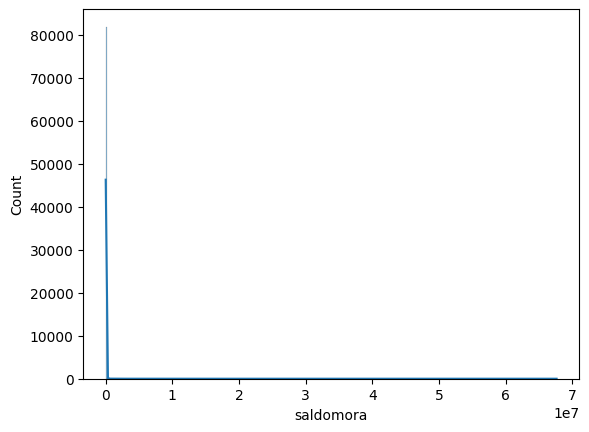

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#bandeuda['saldomora'] = pd.to_numeric(bandeuda['diasatrasados'], errors='coerce')
sns.histplot(bandeuda.saldomora, kde=True, bins = 500)

In [75]:
# dfa_dna_ws0017_la_prd_sandbox.hn_bid_cantidad_empleados_base_laboral


tardeuda = pd.DataFrame()
client = bigquery.Client()

query = client.query(
r'''
  SELECT * FROM `dfa_dna_ws0017_la_prd_sandbox.hn_bid_info_emp_tardeuda`
'''
)

# Almacenar consulta BigQuery en pandas df
tardeuda = query.to_dataframe()
print(tardeuda.shape)

tardeuda.head()

(55961, 53)


,nume_nide,periodoinformacion,numeroreferenciatarjeta,fechaapertura,fechacancelacion,desctipomoneda,montotarjeta,saldototal,pagominimo,descripcioncodigoestado,descnivelmoral,fechamora,saldomora,fechainformacion,codigofuente,descripcioncodigofuente,desctipodeudor,descripcionactividadeconomica,saldovigente,saldovencimiento,saldoejecucion,saldocontingente,saldocastigado,desctipogarantia,categoriariesgodefinitivatransf,desctipocredito,saldointerescapital,saldointeressuspenso,valorgarantia,tasainteres,descripcionformapago,periodogracia,diasatrasados,saldocomision,descripcioncreditoespecial,descorigenfondos,descripcioncreditorefinanciado,descripcionubicaciongeografica,moracapital,morainteres,tipooperacion,categoriaindividual,descripcioncodigoregion,categoriariesgodefinitiva,porcentajereserva,operacionestado,descripcioncreditogrupal,fechaultimopago,costoanual,tasainmobiliaria,montoprovision,operacionreferencia,descrefmoneda
0,0007034171,202209,0001d2f4c2302dab6dab706939179d92e46c1f5f2032c3...,20220210,00000000,LEMPIRA,0000000001970872,10337.490000000,172.000000000,CUENTA NORMAL,SIN MORA O MORA MENOR DE 30 DIAS,00000000,0E-9,20220930,0041,TARJETA BAC,FIADOR O AVAL,ADQUISICION DE OTROS BIENES Y SERVICIOS,10337.490000000,0E-9,0E-9,9371.230000000,0E-9,FIDUCIARIA,I-A,COMERCIAL,0E-9,0E-9,0E-9,48.750000000,Cuota Variable de Capital Mensual,000,00000,0E-9,NO APLICA,FONDOS PROPIOS,NO APLICA,FRANCISCO MORAZAN,0E-9,0E-9,130000,1010,URBANA,1010,000050,VIG,NO APLICA,20220901,000000,000000,51.690000000,,
1,0007034171,202204,0001d2f4c2302dab6dab706939179d92e46c1f5f2032c3...,20220210,00000000,LEMPIRA,0000000001947576,11170.310000000,186.000000000,CUENTA NORMAL,SIN MORA O MORA MENOR DE 30 DIAS,00000000,0E-9,20220430,0041,TARJETA BAC,FIADOR O AVAL,ADQUISICION DE OTROS BIENES Y SERVICIOS,11170.310000000,0E-9,0E-9,8305.450000000,0E-9,FIDUCIARIA,I-A,COMERCIAL,0E-9,0E-9,0E-9,49.310000000,Cuota Variable de Capital Mensual,000,00000,0E-9,NO APLICA,FONDOS PROPIOS,NO APLICA,FRANCISCO MORAZAN,0E-9,0E-9,130000,1010,URBANA,1010,000050,VIG,NO APLICA,20220404,000000,000000,55.850000000,,
2,0007034171,202211,0001d2f4c2302dab6dab706939179d92e46c1f5f2032c3...,20220210,00000000,LEMPIRA,0000000001970352,13011.280000000,216.000000000,4,SIN MORA O MORA MENOR DE 30 DIAS,00000000,0E-9,20221130,0041,TARJETA BAC,FIADOR O AVAL,ADQUISICION DE OTROS BIENES Y SERVICIOS,0E-9,0E-9,0E-9,6692.240000000,0E-9,FIDUCIARIA,I,COMERCIAL,0E-9,0E-9,0E-9,48.510000000,Cuota Variable de Capital Mensual,000,00000,0E-9,NO APLICA,FONDOS PROPIOS,NO APLICA,FRANCISCO MORAZAN,0E-9,0E-9,130000,1010,URBANA,1010,000050,CAN,NO APLICA,20221104,000000,000000,65.060000000,,
3,0007034171,202208,0001d2f4c2302dab6dab706939179d92e46c1f5f2032c3...,20220210,00000000,LEMPIRA,0000000001959088,14706.300000000,245.000000000,CUENTA NORMAL,SIN MORA O MORA MENOR DE 30 DIAS,00000000,0E-9,20220831,0041,TARJETA BAC,FIADOR O AVAL,ADQUISICION DE OTROS BIENES Y SERVICIOS,14706.300000000,0E-9,0E-9,4884.580000000,0E-9,FIDUCIARIA,I-A,COMERCIAL,0E-9,0E-9,0E-9,48.830000000,Cuota Variable de Capital Mensual,000,00000,0E-9,NO APLICA,FONDOS PROPIOS,NO APLICA,FRANCISCO MORAZAN,0E-9,0E-9,130000,1010,URBANA,1010,000050,VIG,NO APLICA,20220804,000000,000000,73.530000000,,
4,0007034171,202203,0001d2f4c2302dab6dab706939179d92e46c1f5f2032c3...,20220210,00000000,LEMPIRA,0000000001947248,5010.370000000,100.000000000,CUENTA NORMAL,SIN MORA O MORA MENOR DE 30 DIAS,00000000,0E-9,20220331,0041,TARJETA BAC,FIADOR O AVAL,ADQUISICION DE OTROS BIENES Y SERVICIOS,5010.370000000,0E-9,0E-9,14462.110000000,0E-9,FIDUCIARIA,I-A,COMERCIAL,0E-9,0E-9,0E-9,49.430000000,Cuota Variable de Capital Mensual,000,00000,0E-9,NO APLICA,FONDOS PROPIOS,NO APLICA,FRANCISCO MORAZAN,0E-9,0E-9,130000,1010,URBANA,1010,000050,VIG,NO APLICA,20220307,000000,000000,25.050000000,,


In [76]:
# Calcular la sumatoria de nulos en cada columna
nulos_por_columna = tardeuda.isnull().sum()

# Imprimir el resultado
nulos_por_columna

# Convert the series to a DataFrame
nulos_por_columna_df = nulos_por_columna.reset_index()

# Rename the columns
nulos_por_columna_df.columns = ['nombre_columna', 'nulos']

nulos_por_columna_df

,nombre_columna,nulos
0,nume_nide,0
1,periodoinformacion,0
2,numeroreferenciatarjeta,0
3,fechaapertura,0
4,fechacancelacion,0
5,desctipomoneda,0
6,montotarjeta,0
7,saldototal,0
8,pagominimo,0
9,descripcioncodigoestado,0


In [78]:
periodos = tardeuda.periodoinformacion.unique()
# Create a DataFrame with the periodos array
df_periodos = pd.DataFrame({'periodos': periodos})

# Sort the DataFrame by the periodos column
df_periodos_sorted = df_periodos.sort_values('periodos')

df_periodos_sorted

,periodos
31,201909
33,201910
20,201911
23,201912
26,202001
9,202002
27,202003
32,202004
17,202005
24,202006


In [80]:
# Convert 'fechaotorgamiento' to datetime
tardeuda['fechaapertura'] = pd.to_datetime(tardeuda['fechaapertura'], format='%Y%m%d')

# Format 'fechaotorgamiento' to YYYYMM
tardeuda['fechaapertura'] = tardeuda['fechaapertura'].dt.strftime('%Y%m')

# Calcula el valor máximo y mínimo de la columna `fechaotorgamiento_2`
print(f"Valor máximo: {int(tardeuda['fechaapertura'].max())}")
print(f"Valor mínimo: {int(tardeuda['fechaapertura'].min())}")

Valor máximo: 202408
Valor mínimo: 199209


In [84]:
tardeuda['fechamora_2'] = pd.to_numeric(tardeuda['fechamora'], errors='coerce')
tardeuda[tardeuda['fechamora_2']==0].shape

(52529, 54)

In [85]:
tardeuda['saldomora'] = tardeuda['saldomora'].replace('0E-9', 0) 
tardeuda['saldomora'] = pd.to_numeric(tardeuda['saldomora'], errors='coerce')
tardeuda.saldomora.mean()

2292.7811543753687

In [88]:
print(tardeuda.saldomora.min())
print(tardeuda.saldomora.max())
print(tardeuda.saldomora.median())

0.0
755257.76
0.0


In [87]:
tardeuda['saldocastigado'] = tardeuda['saldocastigado'].replace('0E-9', 0) 
tardeuda['saldocastigado'] = pd.to_numeric(tardeuda['saldocastigado'], errors='coerce')
print(tardeuda.saldocastigado.mean())
print(tardeuda.saldocastigado.min())
print(tardeuda.saldocastigado.max())
print(tardeuda.saldocastigado.median())

7272.520856310645
0.0
3866102.3
0.0


In [27]:
# dfa_dna_ws0017_la_prd_sandbox.hn_bid_cantidad_empleados_base_laboral


deucomer = pd.DataFrame()
client = bigquery.Client()

query = client.query(
r'''
  SELECT * FROM `dfa_dna_ws0017_la_prd_sandbox.hn_bid_info_emp_deucomer`
'''
)

# Almacenar consulta BigQuery en pandas df
deucomer = query.to_dataframe()
print(deucomer.shape)

deucomer.head()

(1448433, 31)


,nume_nide,periodoinformaciondeu,descripciontipoinformacion,descripciontipocredito,numerocuenta,fechaapertura,fechacancelaciondeu,fechavencimientodeu,numerocuotas,descripciontipomoneda,montootorgamiento,saldototal,pagocuota,descripcioncodigoestado,fechaestado,factorcambio,descripcionnivelmora,fechamora,saldomora,descripciontipodeudor,descripcionformapago,fechainformacion,codigofuente,descripcioncodigofuente,descripciontipogarantia,numerogarantia,valorgarantia,descripciongarantia,situacioncuenta,descripciondestinocredito,tasainteres
0,0007039676,202010,"TELEFONICAS, INTERNET, COMUNICACION DE DATOS",CREDITO A PLAZO,00000000000000573429,20110514,00000000,00000000,000,DOLARES,0E-9,0E-9,0E-9,CUENTA NORMAL,00000000,0000000000000000,SIN MORA O MORA MENOR DE 30 DIAS,00000000,0E-9,DEUDOR DIRECTO,Cuota Fija de Capital Mensual,20201031,1138,CLARO,FIDUCIARIA,,0000000000000000,,,,0000000000000000
1,0002512515,202010,"TELEFONICAS, INTERNET, COMUNICACION DE DATOS",CREDITO A PLAZO,00000000000000580944,20110720,00000000,00000000,000,DOLARES,0E-9,0E-9,0E-9,CUENTA NORMAL,00000000,0000000000000000,SIN MORA O MORA MENOR DE 30 DIAS,00000000,0E-9,DEUDOR DIRECTO,Cuota Fija de Capital Mensual,20201031,1138,CLARO,FIDUCIARIA,,0000000000000000,,,,0000000000000000
2,0003985007,202010,"TELEFONICAS, INTERNET, COMUNICACION DE DATOS",CREDITO A PLAZO,00000000000000821861,20151106,00000000,00000000,000,DOLARES,57.910000000,0E-9,57.910000000,CUENTA NORMAL,00000000,0000000000000000,SIN MORA O MORA MENOR DE 30 DIAS,00000000,0E-9,DEUDOR DIRECTO,Cuota Fija de Capital Mensual,20201031,1138,CLARO,FIDUCIARIA,,0000000000000000,,,,0000000000000000
3,0002525900,202010,"TELEFONICAS, INTERNET, COMUNICACION DE DATOS",CREDITO A PLAZO,00000000000000833113,20160114,00000000,00000000,000,DOLARES,61.550000000,0E-9,61.550000000,CUENTA NORMAL,00000000,0000000000000000,SIN MORA O MORA MENOR DE 30 DIAS,00000000,0E-9,DEUDOR DIRECTO,Cuota Fija de Capital Mensual,20201031,1138,CLARO,FIDUCIARIA,,0000000000000000,,,,0000000000000000
4,0003980018,202010,"TELEFONICAS, INTERNET, COMUNICACION DE DATOS",CREDITO A PLAZO,00000000000000837493,20160205,00000000,00000000,000,DOLARES,33.020000000,0E-9,33.020000000,CUENTA NORMAL,00000000,0000000000000000,SIN MORA O MORA MENOR DE 30 DIAS,00000000,0E-9,DEUDOR DIRECTO,Cuota Fija de Capital Mensual,20201031,1138,CLARO,FIDUCIARIA,,0000000000000000,,,,0000000000000000


In [4]:
# Calcular la sumatoria de nulos en cada columna
nulos_por_columna = deucomer.isnull().sum()

# Imprimir el resultado
nulos_por_columna

# Convert the series to a DataFrame
nulos_por_columna_df = nulos_por_columna.reset_index()

# Rename the columns
nulos_por_columna_df.columns = ['nombre_columna', 'nulos']

nulos_por_columna_df

,nombre_columna,nulos
0,nume_nide,0
1,periodoinformaciondeu,0
2,descripciontipoinformacion,0
3,descripciontipocredito,0
4,numerocuenta,0
5,fechaapertura,0
6,fechacancelaciondeu,0
7,fechavencimientodeu,0
8,numerocuotas,0
9,descripciontipomoneda,0


In [5]:
periodos = deucomer.periodoinformaciondeu.unique()
# Create a DataFrame with the periodos array
df_periodos = pd.DataFrame({'periodos': periodos})

# Sort the DataFrame by the periodos column
df_periodos_sorted = df_periodos.sort_values('periodos')

df_periodos_sorted

,periodos
1,201909
2,201910
3,201911
4,201912
5,202001
6,202002
7,202003
8,202004
9,202005
10,202006


In [10]:
# Convert 'fechaotorgamiento' to datetime
deucomer['fechaapertura'] = pd.to_datetime(deucomer['fechaapertura'], format='%Y%m%d', errors='coerce')

deucomer = deucomer.dropna(subset=['fechaapertura'])
# Format 'fechaotorgamiento' to YYYYMM
deucomer['fechaapertura'] = deucomer['fechaapertura'].dt.strftime('%Y%m')


# Calcula el valor máximo y mínimo de la columna `fechaotorgamiento_2`
print(f"Valor máximo: {int(deucomer['fechaapertura'].max())}")
print(f"Valor mínimo: {int(deucomer['fechaapertura'].min())}")

Valor máximo: 202401
Valor mínimo: 189901


In [18]:
deucomer['fechamora_2'] = pd.to_numeric(deucomer['fechamora'], errors='coerce')
deucomer[deucomer['fechamora_2']==0].shape

(1399890, 32)

In [19]:
# Convierte las columnas `periodoinformacion` y `fechavencimiento` a numérico
deucomer['periodoinformacion_2'] = pd.to_numeric(deucomer['periodoinformaciondeu'], errors='coerce')
#bandeuda['fechavencimiento_2'] = pd.to_numeric(bandeuda['fechamora_2'], errors='coerce')

# Create boolean columns
deucomer['vencido'] = deucomer['fechamora_2'] > deucomer['periodoinformacion_2']
deucomer['no_vencido'] = deucomer['fechamora_2'] <= deucomer['periodoinformacion_2']

# Group by 'nume_nide' and sum the boolean columns
vencidos_por_nume_nide = deucomer.groupby('nume_nide')[['vencido', 'no_vencido']].sum()

# Imprime la cantidad de valores únicos de `nume_nide`
vencidos_por_nume_nide.no_vencido.sum()


1399890

In [20]:
vencidos_por_nume_nide.vencido.sum()

48543

In [16]:
deucomer.shape

(206594, 35)

In [22]:
deucomer['saldomora'] = deucomer['saldomora'].replace('0E-9', 0) 
deucomer['saldomora'] = pd.to_numeric(deucomer['saldomora'], errors='coerce')
print(deucomer.saldomora.mean())
print(deucomer.saldomora.min())
print(deucomer.saldomora.max())
print(deucomer.saldomora.median())

3230.925651801995
0.0
44719913.31
0.0


In [24]:
deucomer['saldototal'] = deucomer['saldototal'].replace('0E-9', 0) 
deucomer['saldototal'] = pd.to_numeric(deucomer['saldototal'], errors='coerce')
print(deucomer.saldototal.mean())
print(deucomer.saldototal.min())
print(deucomer.saldototal.max())
print(deucomer.saldototal.median())

21245.783674076727
0.0
99429687.5
0.0


In [26]:
deucomer['descripcionnivelmora'].unique()

array(['MORA ENTRA 30 A 59 DIAS', 'SIN MORA O MORA MENOR DE 30 DIAS',
       'MORA ENTRE 60 A 89 DIAS', 'MORA ENTRE 180 O MAS DIAS',
       'MORA ENTRE 120 A 149 DIAS', 'MORA ENTRE 90 A 119 DIAS',
       'MORA ENTRE 150 A 179 DIAS'], dtype=object)

In [ ]:
import pandas as pd

def calcular_diasatrasados(row):
  """
  Calcula los días atrasados según la lógica del CASE statement.

  Args:
    row: Una fila del DataFrame deucomer.

  Returns:
    El número de días atrasados.
  """
  if row['fechamora'] == '00000000':
    return 0
  elif row['descripcionnivelmora'] == 'MORA ENTRE 180 O MAS DIAS':
    return 195
  elif row['descripcionnivelmora'] == 'MORA ENTRE 150 A 179 DIAS':
    return 165
  elif row['descripcionnivelmora'] == 'MORA ENTRE 120 A 149 DIAS':
    return 135
  elif row['descripcionnivelmora'] == 'MORA ENTRE 90 A 119 DIAS':
    return 105
  elif row['descripcionnivelmora'] == 'MORA ENTRE 60 A 89 DIAS':
    return 75
  elif row['descripcionnivelmora'] == 'MORA ENTRA 30 A 59 DIAS':
    return 45
  elif row['descripcionnivelmora'] == 'SIN MORA O MORA MENOR DE 30 DIAS':
    return 15
  else:
    return 0

# Aplicar la función a cada fila del DataFrame
deucomer['diasatrasados'] = deucomer.apply(calcular_diasatrasados, axis=1)
print(deucomer.diasatrasados.mean())
print(deucomer.diasatrasados.min())
print(deucomer.diasatrasados.max())
print(deucomer.diasatrasados.median())

2.9334977869186907
0
195
0.0


In [4]:
len(df.NUME_NIDE.unique())

1220001

In [5]:
len(df.EMPRESA.unique())

36658

In [6]:
df.shape

(10538686, 15)

In [7]:
df_emp = df.EMPRESA.unique()

In [13]:
import pandas as pd
from fuzzywuzzy import fuzz
import re

# Supongamos que tienes un DataFrame con una columna 'empresa'
#df = pd.DataFrame({
#    'empresa': df
#})

# Función para extraer siglas y generar una representación combinada sin palabras de dos o menos letras
def extraer_siglas(nombre):
    if not nombre:  # Verifica si el nombre es None o vacío
        return ""
    # Quitar puntos y convertir a mayúsculas
    nombre = nombre.upper().replace(".", "")
    # Extraer solo palabras de más de dos letras para evitar palabras cortas
    siglas = "".join([palabra[0] for palabra in re.findall(r'\b[A-Z]{3,}\b', nombre)])
    if not siglas:  # En caso de que las siglas no se generen
        siglas = "".join([palabra[0] for palabra in nombre.split() if len(palabra) > 2])
    return siglas.strip()

# Crear una nueva columna con la combinación de siglas
df['siglas'] = df['empresa'].apply(lambda x: extraer_siglas(x))

# Función para verificar si una cadena es una sigla de otra
def es_variante(nombre1, nombre2):
    if not nombre1 or not nombre2:
        return False
    # Extraer siglas de ambos nombres
    siglas1 = extraer_siglas(nombre1)
    siglas2 = extraer_siglas(nombre2)
    # Verificar si una de las siglas coincide con el nombre completo o si son similares
    if siglas1 == siglas2 and siglas1 != "":
        return True
    # Compara las combinaciones usando un umbral de similitud
    ratio = fuzz.token_sort_ratio(nombre1, nombre2)
    return ratio > 80

# Función para agrupar nombres similares usando siglas y nombres completos
def agrupar_nombres_similares(df):
    clusters = []
    cluster_ids = [-1] * len(df)  # Inicializa con -1, indicando que no tiene cluster
    cluster_id = 0

    for i in range(len(df)):
        if cluster_ids[i] != -1:  # Si ya tiene un cluster, salta
            continue
        # Crea un nuevo cluster para el nombre actual
        cluster_ids[i] = cluster_id
        cluster = [df['empresa'][i]]
        
        for j in range(i + 1, len(df)):
            if cluster_ids[j] == -1:  # Solo compara si aún no tiene cluster
                if es_variante(df['empresa'][i], df['empresa'][j]):
                    cluster_ids[j] = cluster_id
                    cluster.append(df['empresa'][j])
        
        # Solo añadimos el cluster si tiene dos o más nombres
        if len(cluster) > 1:
            clusters.append(cluster)
            cluster_id += 1
        else:
            # Reseteamos el cluster_id de los elementos únicos
            cluster_ids[i] = -1
    
    return clusters, cluster_ids

# Agrupamos nombres similares y obtenemos una lista de clusters
clusters, cluster_ids = agrupar_nombres_similares(df)
df['cluster_id'] = cluster_ids

# Filtramos solo los nombres que pertenecen a clusters de dos o más
df_filtrado = df[df['cluster_id'] != -1].reset_index(drop=True)

# Mostramos los clusters encontrados y el DataFrame filtrado
print("Clusters de dos o más nombres:")
for i, cluster in enumerate(clusters):
    print(f"Cluster {i}: {cluster}")



ModuleNotFoundError: No module named 'fuzzywuzzy'

In [8]:
import pandas as pd
from rapidfuzz import fuzz
from collections import defaultdict

# Función para agrupar nombres similares
def agrupar_nombres_similares(df, columna, threshold=80):
    clusters = []
    cluster_ids = [-1] * len(df)
    
    # Comprobamos si la columna existe y si tiene valores no nulos
    if columna not in df.columns:
        raise ValueError(f"La columna '{columna}' no existe en el DataFrame")
    
    # Preprocesamiento: convertir a minúsculas y eliminar palabras comunes
    nombres = df[columna].fillna('').str.lower().str.replace(r'\b(de|la|del|y|s\.a\.)\b', '', regex=True)
    grupos_prefijo = defaultdict(list)

    # Agrupamos por las primeras 3 letras para reducir el número de comparaciones
    for idx, nombre in enumerate(nombres):
        if not nombre:  # Saltamos nombres vacíos
            continue
        prefijo = nombre[:3]  # Primeras 3 letras del nombre
        grupos_prefijo[prefijo].append((idx, nombre))

    # Realizamos la agrupación en cada grupo de prefijo
    cluster_id = 0
    for _, grupo in grupos_prefijo.items():
        for i, (idx1, nombre1) in enumerate(grupo):
            if cluster_ids[idx1] == -1:  # Solo procesamos si no ha sido agrupado
                cluster_actual = [idx1]
                cluster_ids[idx1] = cluster_id
                
                for j in range(i + 1, len(grupo)):
                    idx2, nombre2 = grupo[j]
                    if cluster_ids[idx2] == -1:  # Solo si no ha sido agrupado
                        if fuzz.ratio(nombre1, nombre2) >= threshold:
                            cluster_actual.append(idx2)
                            cluster_ids[idx2] = cluster_id
                
                if len(cluster_actual) > 1:  # Solo agregamos clusters de 2 o más nombres
                    clusters.append([df[columna].iloc[idx] for idx in cluster_actual])
                    cluster_id += 1

    return clusters, cluster_ids

# Ejemplo de uso
#df = pd.DataFrame({
#    'empresa': [
#        'INSTITUTO HONDUREÑO DE SEGURIDAD SOCIAL', 'I.H.S.S.', 'IHSS',
#        'INST. HONDURENO DE SEGURIDAD SOCIAL', 'INSTITUTO HONDUREÑO DE SEGURIDAD SOCIAL',
#        'EMPRESA EXAMPLE', 'EXAMPLE CO', 'COMPANY INC', 'COMPANY INCORPORATED'
#    ]
#})

df_e = pd.DataFrame({
    'EMPRESA': df_emp
})

# Aplicamos la función
clusters, cluster_ids = agrupar_nombres_similares(df_e, 'EMPRESA', threshold=85)
df_e['cluster_id'] = cluster_ids

# Filtramos los clusters de dos o más nombres
df_filtrado = df_e[df_e['cluster_id'] != -1].reset_index(drop=True)

# Mostramos resultados
print("Clusters de dos o más nombres:")
for i, cluster in enumerate(clusters):
    print(f"Cluster {i}: {cluster}")



ModuleNotFoundError: No module named 'rapidfuzz'

In [ ]:
!pip install rapidfuzz

In [35]:
from rapidfuzz import fuzz, process
import pandas as pd
from collections import defaultdict
import re

def limpiar_nombre(nombre):
    if not nombre:  # Verifica si el nombre es None o vacío
        return ""
    # Convertimos a minúsculas y eliminamos caracteres especiales
    nombre = re.sub(r'[^a-zA-Z0-9áéíóúÁÉÍÓÚñÑ\s]', '', nombre)  # Eliminar caracteres no alfanuméricos excepto espacios
    return nombre.upper().strip()

# Aplicar la limpieza a la columna 'EMPRESA'
df_e['EMPRESA_LIMPIA'] = df_e['EMPRESA'].apply(limpiar_nombre)


def agrupar_nombres_similares(df, columna, threshold=80):
    clusters = []
    cluster_ids = [-1] * len(df)

    # Verificar si la columna existe y tiene valores no nulos
    if columna not in df.columns:
        raise ValueError(f"La columna '{columna}' no existe en el DataFrame")

    # Preprocesamiento: convertir a minúsculas y eliminar palabras comunes
    nombres = df[columna].fillna('').str.lower().str.replace(r'\b(de|la|del|y|s\.a\.|r\.l\.|c\.v\.)\b', '', regex=True)
    grupos_prefijo = defaultdict(list)

    # Agrupar por prefijos de 4 letras para reducir el número de comparaciones
    for idx, nombre in enumerate(nombres):
        if not nombre:  # Saltar nombres vacíos
            continue
        prefijo = nombre[:4]  # Primeras 4 letras del nombre
        grupos_prefijo[prefijo].append((idx, nombre))

    # Agrupar nombres similares en cada grupo de prefijo
    cluster_id = 0
    for _, grupo in grupos_prefijo.items():
        nombres_no_agrupados = [(idx, nombre) for idx, nombre in grupo if cluster_ids[idx] == -1]
        
        # Usar RapidFuzz para buscar nombres similares dentro del grupo
        for idx1, nombre1 in nombres_no_agrupados:
            if cluster_ids[idx1] != -1:
                continue  # Si ya está agrupado, pasamos al siguiente
            cluster_actual = [idx1]
            cluster_ids[idx1] = cluster_id

            for idx2, nombre2 in nombres_no_agrupados:
                if idx1 != idx2 and cluster_ids[idx2] == -1:
                    similarity = fuzz.token_set_ratio(nombre1, nombre2)
                    if similarity >= threshold:
                        cluster_actual.append(idx2)
                        cluster_ids[idx2] = cluster_id

            if len(cluster_actual) > 1:  # Solo agregar clusters de 2 o más nombres
                clusters.append([df[columna].iloc[idx] for idx in cluster_actual])
            cluster_id += 1

    return clusters, cluster_ids


# Aplicar la función
clusters, cluster_ids = agrupar_nombres_similares(df_e, 'EMPRESA_LIMPIA', threshold=87)
df_e['cluster_id'] = cluster_ids

# Filtrar los clusters de dos o más nombres
df_filtrado = df_e[df_e['cluster_id'] != -1].reset_index(drop=True)

# Mostrar resultados
print("Clusters de dos o más nombres:")
for i, cluster in enumerate(clusters):
    print(f"Cluster {i}: {cluster}")

Clusters de dos o más nombres:
Cluster 0: ['CONTROLES Y MATERIALES ELECTRICOS   SDE RL', 'CONTROLES Y MATERIALES ELECTRICOS', 'CONTROLES Y MATERIALES ELECTRICOS S DE RL']
Cluster 1: ['CONTRATISTAS TECNICOS DE SEGURIDAD   SDE RL', 'CONTRATISTAS TECNICOS DE SEGURIDAD S DE R L', 'CONTRATISTA TECNICOS DE SEGURIDAD S DE R L']
Cluster 2: ['CONTROL Y SOSTENIBILIDAD    SA', 'CONTROL P   SA']
Cluster 3: ['CONTRATISTAS ELECTROMECANICOS S DE RL DE C V', 'CONTRATISTAS ELECTROMECANICOS SA CV', 'CONTRATISTAS ELECTROMECANICOS   SADE CV']
Cluster 4: ['CONTADORES ASESORES Y AUDITORES    SDE RL', 'CONTADORES Y ASESORES   SDE RL']
Cluster 5: ['CONTENEDORES Y SERVICIOS   SADE CV', 'CONTENEDORES  Y SERVICIOS    SADE CV']
Cluster 6: ['HANES CHOLOMASDE RL', 'HANES CHOLOMA   SDE RL']
Cluster 7: ['ELDONS     SADE CV', 'ELDONS     SADE CV']
Cluster 8: ['SERVICIOS ADMINISTRATIVOS JOSVAR SA', 'SERVICIOS ADMINISTRATIVOS JOSVAR  S A']
Cluster 9: ['SERVICIOS DE MANTENIMIENTO Y CONSTRUCCION SA DE CV', 'SERVICIOS DE M

In [ ]:
# unir siglas
# cambiar nombre de clusters a primero del string

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Vectorizamos los nombres de los clusters
vectorizer = TfidfVectorizer().fit_transform(df_e['EMPRESA'].fillna(''))
similarity_matrix = cosine_similarity(vectorizer)

# Definimos un umbral de similitud para unir clusters
threshold = 0.95  

# Creamos un diccionario para fusionar clusters similares
cluster_merge_map = {}

for i in range(similarity_matrix.shape[0]):
    for j in range(i + 1, similarity_matrix.shape[0]):
        if similarity_matrix[i, j] > threshold:
            cluster_id_i = df_e.loc[i, 'cluster_id']
            cluster_id_j = df_e.loc[j, 'cluster_id']
            
            # Asigna el mismo ID de cluster para unirlos
            cluster_merge_map[cluster_id_j] = cluster_id_i

# Reemplazamos los cluster_ids en el DataFrame original
df_e['cluster_id'] = df_e['cluster_id'].apply(lambda x: cluster_merge_map.get(x, x))

KeyboardInterrupt: 

In [28]:
len(df_e.cluster_id.unique())

28660

In [21]:
df_e[df_e['cluster_id'] == 721]

,EMPRESA,cluster_id,EMPRESA_LIMPIA
8,INSTITUTO HONDUREÐO DE SEGURIDAD SOCIAL,721,INSTITUTO HONDUREO DE SEGURIDAD SOCIAL
141,INSTITUTO HOND.DE SEGURIDAD SOCIAL,721,INSTITUTO HONDDE SEGURIDAD SOCIAL
2485,INSTITUTO HOND. DE SEGURIDAD SOCIAL,721,INSTITUTO HOND DE SEGURIDAD SOCIAL
4321,INSTITUTO HOND SEGURIDAD SOCIAL,721,INSTITUTO HOND SEGURIDAD SOCIAL
20216,INSTITUTO HOND DE SEGURIDAD SOCIAL,721,INSTITUTO HOND DE SEGURIDAD SOCIAL


In [36]:
df_e[df_e['EMPRESA_LIMPIA'] == 'IHSS']

,EMPRESA,cluster_id,EMPRESA_LIMPIA
32378,IHSS,26977,IHSS
34698,I.H.S.S.,26977,IHSS


In [38]:
#df_e.head(300)

In [39]:
#26977 IHSS
# 578 el otro
df_e['cluster_id'] = df_e['cluster_id'].replace(26977, 578)

In [23]:
clusters_unidos.head(10)

NameError: name 'clusters_unidos' is not defined

In [11]:
! pip install rapidfuzz

Looking in indexes: https://nrm.us.equifax.com/repository/efxpypi/simple, https://nrm.us.equifax.com/repository/df-vertexai-release-pypi-hosted/simple
  Using cached https://nrm.us.equifax.com/repository/efxpypi/packages/rapidfuzz/3.10.1/rapidfuzz-3.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)


In [40]:
# Paso 1: Agrupar empresas por cluster_id y unir sus nombres
clusters_unidos = df_e.groupby('cluster_id')['EMPRESA_LIMPIA'].apply(lambda x: ', '.join(x.dropna())).reset_index()

# Renombrar la columna de empresas para mayor claridad
clusters_unidos.columns = ['cluster_id', 'empresas_unidas']

# Paso 2: Guardar el resultado en un archivo CSV
#clusters_unidos.to_csv('clusters_unidos.csv', index=False)

clusters_unidos.head()

,cluster_id,empresas_unidas
0,-1,
1,0,CONTRATISTAS ASOCIADOSSADE CV
2,1,"CONTROLES Y MATERIALES ELECTRICOS SDE RL, CO..."
3,2,"CONTRATISTAS TECNICOS DE SEGURIDAD SDE RL, C..."
4,3,CONTRATISTAS ASOCIADOS S A DE C V


In [25]:
clusters_unidos['cluster_id'] = clusters_unidos['empresas_unidas'].apply(lambda x: str(x).split(',')[0].strip())

clusters_unidos.head()

,cluster_id,empresas_unidas
0,,
1,CONTRATISTAS ASOCIADOSSADE CV,CONTRATISTAS ASOCIADOSSADE CV
2,CONTROLES Y MATERIALES ELECTRICOS SDE RL,"CONTROLES Y MATERIALES ELECTRICOS SDE RL, CO..."
3,CONTRATISTAS TECNICOS DE SEGURIDAD SDE RL,"CONTRATISTAS TECNICOS DE SEGURIDAD SDE RL, C..."
4,CONTRATISTAS ASOCIADOS S A DE C V,CONTRATISTAS ASOCIADOS S A DE C V


In [62]:
clusters_unidos.head()

,cluster_id,empresas_unidas
0,-1,
1,0,"BANCO DEL PAIS SA, BANCO DEL PAIS SA, BANCO..."
2,1,"BANCO DE HONDURAS SA, BANCO AZTECA DE HONDURAS..."
3,2,"BANCO DE OCCIDENTE SA, BANCO DE OCCIDENTE ..."
4,3,BANCO LAFISE SA


In [ ]:
#28205 IHSS
# 210 el otro

In [60]:
df_e.head()

,EMPRESA,cluster_id,EMPRESA_LIMPIA
0,BANCO DEL PAIS S.A.,0,BANCO DEL PAIS SA
1,INTERMODA S.A.DE C.V.,25,INTERMODA SADE CV
2,BOQUITAS FIESTAS S.DE R.L.,153,BOQUITAS FIESTAS SDE RL
3,ACCESO FINANCIERO S.DE R.L.,162,ACCESO FINANCIERO SDE RL
4,SECRETARIA DE SEGURIDAD,182,SECRETARIA DE SEGURIDAD


In [138]:
# Dividir la columna 'empresas_unidas' en elementos separados por comas
clusters_unidos['elementos'] = clusters_unidos['empresas_unidas'].str.split(',')

# Obtener el número de elementos en cada fila de la columna 'elementos'
clusters_unidos['conteo_elementos'] = clusters_unidos['elementos'].apply(len)

# Filtrar filas donde 'conteo_elementos' sea mayor o igual que 2
clusters_filtrados = clusters_unidos[clusters_unidos['conteo_elementos'] >= 2]

# Mostrar las primeras 5 filas del DataFrame filtrado
clusters_filtrados.to_csv('clusters_mayor_igual_2.csv', index=False)

# Mostrar las columnas y sus tipos del DataFrame filtrado
clusters_filtrados

,cluster_id,empresas_unidas,elementos,conteo_elementos
2,1,"UNIVERSIDAD NAC.AUTONOMA DE HONDURAS, UNIVERSI...","[UNIVERSIDAD NAC.AUTONOMA DE HONDURAS, UNIVER...",2
10,9,"UNIVERSIDAD PEDAGOGICA NAC.FCO MORA, UNIVERSID...","[UNIVERSIDAD PEDAGOGICA NAC.FCO MORA, UNIVERS...",2
12,11,"UNIVERSIDAD POLITECNICA DE HONDURAS, UNIVERSID...","[UNIVERSIDAD POLITECNICA DE HONDURAS, UNIVERS...",2
13,12,UNIVERSIDAD CRISTIANA EVANGELICA NUEVO MILENIO...,[UNIVERSIDAD CRISTIANA EVANGELICA NUEVO MILENI...,2
16,15,"UNIVERSAL AUTOMOTRIZ S.A.DE C.V., UNIVERSAL AU...","[UNIVERSAL AUTOMOTRIZ S.A.DE C.V., UNIVERSAL ...",2
20,19,"UNIVERSIDAD PEDAGOGICA NAC. FCO MORAZAN, UNIVE...","[UNIVERSIDAD PEDAGOGICA NAC. FCO MORAZAN, UNI...",2
29,28,"FLEXIBLES Y MARKETING HONDURAS S.A.DE C.V, F...","[FLEXIBLES Y MARKETING HONDURAS S.A.DE C.V, ...",2
34,33,"MINISTERIO INTERNACIONAL LA COSECHA., MINISTER...","[MINISTERIO INTERNACIONAL LA COSECHA., MINIST...",4
36,35,"MINISTERIO APOSTOLICO Y PROFETICO, MINISTERIO ...","[MINISTERIO APOSTOLICO Y PROFETICO, MINISTERI...",2
38,37,"MINISTERIO DE NIÐOS ARCA DE NOE, MINISTERIO DE...","[MINISTERIO DE NIÐOS ARCA DE NOE, MINISTERIO ...",4


In [41]:
df_final = clusters_unidos.merge(df_e, on='cluster_id', how='left')

In [42]:
df_final.head()

,cluster_id,empresas_unidas,EMPRESA,EMPRESA_LIMPIA
0,-1,,None,
1,0,CONTRATISTAS ASOCIADOSSADE CV,"CONTRATISTAS ASOCIADOS,S.A.DE C.V.",CONTRATISTAS ASOCIADOSSADE CV
2,1,"CONTROLES Y MATERIALES ELECTRICOS SDE RL, CO...",CONTROLES Y MATERIALES ELECTRICOS S.DE R.L.,CONTROLES Y MATERIALES ELECTRICOS SDE RL
3,1,"CONTROLES Y MATERIALES ELECTRICOS SDE RL, CO...",CONTROLES Y MATERIALES ELECTRICOS,CONTROLES Y MATERIALES ELECTRICOS
4,1,"CONTROLES Y MATERIALES ELECTRICOS SDE RL, CO...",CONTROLES Y MATERIALES ELECTRICOS S DE RL,CONTROLES Y MATERIALES ELECTRICOS S DE RL


In [44]:
df_final.to_csv('clusters_empresas_2.csv', index=False)

In [43]:
df_final['cluster_id'] = df_final['empresas_unidas'].apply(lambda x: str(x).split(',')[0].strip())

df_final.head()

,cluster_id,empresas_unidas,EMPRESA,EMPRESA_LIMPIA
0,,,None,
1,CONTRATISTAS ASOCIADOSSADE CV,CONTRATISTAS ASOCIADOSSADE CV,"CONTRATISTAS ASOCIADOS,S.A.DE C.V.",CONTRATISTAS ASOCIADOSSADE CV
2,CONTROLES Y MATERIALES ELECTRICOS SDE RL,"CONTROLES Y MATERIALES ELECTRICOS SDE RL, CO...",CONTROLES Y MATERIALES ELECTRICOS S.DE R.L.,CONTROLES Y MATERIALES ELECTRICOS SDE RL
3,CONTROLES Y MATERIALES ELECTRICOS SDE RL,"CONTROLES Y MATERIALES ELECTRICOS SDE RL, CO...",CONTROLES Y MATERIALES ELECTRICOS,CONTROLES Y MATERIALES ELECTRICOS
4,CONTROLES Y MATERIALES ELECTRICOS SDE RL,"CONTROLES Y MATERIALES ELECTRICOS SDE RL, CO...",CONTROLES Y MATERIALES ELECTRICOS S DE RL,CONTROLES Y MATERIALES ELECTRICOS S DE RL


In [45]:
df_entrega = df.merge(df_final, on='EMPRESA', how='left')

df_entrega.head()

,EMPRESA,RAZON,RTN,DIREC,TELEFONO,IDENTIDAD,NOMBRECOMP,TELEFONOEM,CELULAREMP,DIRECCIONE,PERIODO,FECHA_CARGA,OTROTELEFONO1,OTROTELEFONO2,NUME_NIDE,cluster_id,empresas_unidas,EMPRESA_LIMPIA
0,"CONTRATISTAS ASOCIADOS,S.A.DE C.V.",CASA,None,None,22453712,103fb09154adbc5a31d6616284de099ef5484401742191...,eaf732c2ce7978d76a122bc810e9ce01db965e0d14131e...,None,None,TEG. CENTRO COMERCIAL PLAZA MIRAFLORES CAMBIA...,201912,20191231,None,None,0006889834,CONTRATISTAS ASOCIADOSSADE CV,CONTRATISTAS ASOCIADOSSADE CV,CONTRATISTAS ASOCIADOSSADE CV
1,HANES CHOLOMAS.DE R.L.,HANES CHOLOMAS.DE R.L.,None,CORTES CHOLOMA SAN JOSE DE LOS LAURE SAN JOSE ...,22563640,b62ab44cd5c3403eb50da5103813ac46bd5564c69c4c34...,f78ed393a5b3b9ba87960476b99460a3c58c8262857a59...,None,None,CHOLOMA.PARQUE ZIP CHOLOMA,201912,20191231,None,None,0001645991,HANES CHOLOMASDE RL,"HANES CHOLOMASDE RL, HANES CHOLOMA SDE RL",HANES CHOLOMASDE RL
2,ELDON'S S.A.DE C.V.,ELDON'S S.A.DE C.V.,None,ISLAS DE LA BAHIA ROATAN COXEN HOLE LA PUNTA...,24557584,ec262da147c3cd36cdaa76e2b5e30731e6a96a63828a3e...,6fb69c50fcf9609c197cd2b36dd5dc6ecf6a1017dd2277...,None,None,ISLAS DE LA BAHIA ROATAN FRENCH HARBOR CGO A G...,201912,20191231,None,None,0001669455,ELDONS SADE CV,"ELDONS SADE CV, ELDONS SADE CV",ELDONS SADE CV
3,SERVICIOS ADMINISTRATIVOS JOSVAR S.A.,SERVICIOS ADM JOSVAR S.A.,None,CORTES SAN PEDRO SULA SAN PEDRO SULA SAN PEDRO...,25090794,a2d501dc927e18108ed359d913873c4beacd26d4622382...,abb56b02f898c3fe4d7fd19a24d384b25b5110ab0881aa...,98958555,None,SPS. COL. FIGUEROA 10 CLL. 26-27 AVE. MURO COL...,201912,20191231,None,None,0002832513,SERVICIOS ADMINISTRATIVOS JOSVAR SA,"SERVICIOS ADMINISTRATIVOS JOSVAR SA, SERVICIOS...",SERVICIOS ADMINISTRATIVOS JOSVAR SA
4,SAYBE Y ASOCIADOS S.DE R.L.,SAYBE Y ASOCIADOS S.DE R.L.,None,CORTES SAN PEDRO SULA SAN PEDRO SULA SAN PEDRO...,25533094,33084a73f20413f98f59e40bc27e0afa36015a578b6b20...,f724c76e2262de3765afee0b7f24722b358cc8d405060a...,None,31951844,S.P.S 16-17AV 2-3CLL N O N 116,201912,20191231,None,None,0000493852,SAYBE Y ASOCIADOS SDE RL,"SAYBE Y ASOCIADOS SDE RL, SAYBE Y ASOCIADOSSDE...",SAYBE Y ASOCIADOS SDE RL


In [31]:
table_id = f'dfa_dna_ws0017_la_prd_sandbox.HN_TTEL_DIR_EXTERNA_CLUSTERIZADO'
#ProyectoID y Dataset de donde se extrae la infomacion y se guardará la tabla
project_id = 'dfa-dna-ws0017-la-prd-2423' 
dataset_id = 'dfa_dna_ws0017_la_prd_sandbox'


In [ ]:
import pandas_gbq
pandas_gbq.to_gbq(df_entrega, 
                  table_id, 
                  project_id=project_id, 
#                  table_schema=schema_perf,
                  if_exists='replace',
                  chunksize=None)

In [80]:
# Filtramos los clusters que contienen el mismo nume_nide en todas sus filas
def eliminar_clusters_identicos_nide(df):
    grupos = df.groupby('cluster_id').filter(lambda x: len(x['NUME_NIDE'].unique()) > 1)
    return grupos

empresas_filtradas = eliminar_clusters_identicos_nide(df_final)

In [81]:
empresas_filtradas.shape

(10538383, 16)

In [85]:
# Contamos la cantidad de nume_nide únicos para cada empresa
conteo_nide_por_empresa = df.groupby('EMPRESA')['NUME_NIDE'].nunique().reset_index()

# Renombramos la columna para indicar que es el conteo
conteo_nide_por_empresa = conteo_nide_por_empresa.rename(columns={'NUME_NIDE': 'conteo_nume_nide'})

# Mostramos el resultado
conteo_nide_por_empresa.sort_values('conteo_nume_nide').tail(200)

,EMPRESA,conteo_nume_nide
28757,PRESIDENCIA DE LA REPUBLICA,1263
30270,RESULTS HONDURAS S A,1265
3724,BASIC APPARELS.DE R.L.,1270
3568,BANCO PROMERICA S.A.,1271
11754,ELCATEX S.DE R.L.DE C.V.,1275
35237,UNION COMERCIAL DE HONDURAS S.A.C.V,1278
34512,THE WORKLOOP S.A.,1280
16456,HANES INK HONDURAS S.A. DE C.V.,1292
32029,SERVICE AND TRADING BUSINESS S.A.DE C.V.,1293
34994,TRIBUNAL SUPREMO ELECTORAL,1293


In [70]:
# Obtenemos los nombres únicos de las empresas
empresas_unicas = df[['EMPRESA', 'NUME_NIDE']].drop_duplicates()

# Aplicamos el proceso de clustering a los nombres únicos
clusters, cluster_ids = agrupar_nombres_similares(df, 'EMPRESA', threshold=95)

# Asignamos los cluster_ids al DataFrame de empresas únicas
empresas_unicas['cluster_id'] = cluster_ids

# Filtramos los clusters que contienen el mismo nume_nide en todas sus filas
def eliminar_clusters_identicos_nide(df):
    grupos = df.groupby('cluster_id').filter(lambda x: len(x['NUME_NIDE'].unique()) > 1)
    return grupos

empresas_filtradas = eliminar_clusters_identicos_nide(empresas_unicas)

# Unimos los resultados con el DataFrame original
df_final = df.merge(empresas_filtradas[['EMPRESA', 'cluster_id']], on='EMPRESA', how='left')

KeyboardInterrupt: 